# Investigation of different modules

## Import statements

In [121]:
import pandas as pd
import numpy as np
import datetime
import os
import re
import matplotlib.pyplot as plt

## Loading data and folder settings

In [122]:
folder_data = '/Users/hkromer/01_Projects/10.SolarAnlage/01.Analytics/Moduldaten/'

# output dataframe
# current time for the year month day
currentDT = datetime.datetime.now()
directory = f'{folder_data}/cleaned_data'
if not os.path.exists(directory):
    os.makedirs(directory)
filename_df_out = f'{directory}/{currentDT.year}-{currentDT.month}-{currentDT.day}_solarData.csv'



## Import data and combine into one dataframe

In [123]:
# list of files
files = os.listdir(folder_data)
files = [f for f in files if f.endswith('.csv')]

df = pd.DataFrame()
for file in files:
	df_t = pd.read_csv('{}/{}'.format(folder_data,file))
	df = df.append(df_t)

# change columns to only contain identifier
cols = df.columns

id_cols = [re.findall(r'(1.1.\d+) E',c)[0] for c in cols[1:]]

my_cols = [cols[0]]

[my_cols.append(i) for i in id_cols]

df.columns = my_cols

print(df.head())
df.to_csv(f'{filename_df_out}')

         Time   1.1.1   1.1.2   1.1.3   1.1.4   1.1.5   1.1.6   1.1.7   1.1.8  \
0  01.02.2018  505.25  245.50  476.50  476.00  484.25  470.50  480.00  480.50   
1  02.02.2018  283.00  208.50  258.25  250.00  240.50  217.75  238.75  248.00   
2  03.02.2018  236.00  183.75  213.25  211.25  216.25  199.00  217.25  217.75   
3  04.02.2018  692.75  217.00  646.75  643.50  533.25  340.50  600.25  633.75   
4  05.02.2018  612.25  301.25  578.50  572.75  555.25  486.00  547.00  569.75   

    1.1.9  ...  1.1.27  1.1.28  1.1.29  1.1.30  1.1.31  1.1.32  1.1.33  \
0  481.00  ...  293.50  254.50  287.50  286.25  306.50  303.50  302.50   
1  261.50  ...  250.25  197.00  231.75  236.50  219.75  214.50  209.00   
2  219.00  ...  188.25  154.50  183.25  183.25  191.75  189.00  186.00   
3  647.75  ...  544.25  514.00  482.00  472.75  334.25  339.75  333.50   
4  581.25  ...  391.25  345.25  356.50  357.25  332.25  331.75  326.75   

   1.1.34  1.1.35  1.1.36  
0  306.00  322.25   311.5  
1  214.75  2

## Change the index to time series

## Convert from Wh to kWh

In [124]:
# Prepare a format string: time_format
time_format = '%d.%m.%Y'

# Convert date_list into a datetime object: my_datetimes
df['Time'] = pd.to_datetime(df['Time'], format=time_format)  
df = df.set_index('Time').sort_index()

# convert from Wh to kWh
df[df.columns] = df[df.columns] / 1000 
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 500 entries, 2017-10-12 to 2019-02-16
Data columns (total 36 columns):
1.1.1     499 non-null float64
1.1.2     497 non-null float64
1.1.3     499 non-null float64
1.1.4     500 non-null float64
1.1.5     499 non-null float64
1.1.6     499 non-null float64
1.1.7     499 non-null float64
1.1.8     499 non-null float64
1.1.9     499 non-null float64
1.1.10    500 non-null float64
1.1.11    500 non-null float64
1.1.12    500 non-null float64
1.1.13    499 non-null float64
1.1.14    494 non-null float64
1.1.15    496 non-null float64
1.1.16    499 non-null float64
1.1.17    499 non-null float64
1.1.18    498 non-null float64
1.1.19    499 non-null float64
1.1.20    500 non-null float64
1.1.21    494 non-null float64
1.1.22    499 non-null float64
1.1.23    500 non-null float64
1.1.24    500 non-null float64
1.1.25    500 non-null float64
1.1.26    499 non-null float64
1.1.27    500 non-null float64
1.1.28    499 non-null float64
1.1.29  

## Relate modules to position - Auslegung
from monitoring

In [125]:
module_position = {'Südwesten': [f'1.1.{s}' for s in [1, 16, 3,4,5,10,9,8,7,6,11,12,13,14]],
                  'Westen': [f'1.1.{s}' for s in [15,2,18,17,19,20]],
                  'Südost_oben': [f'1.1.{s}' for s in [28,27,26,25,24,23,22,21,29,30]],
                  'Südost_unten': [f'1.1.{s}' for s in [31,32,33,34,35,36]]}

print(df.loc[:,module_position['Südwesten']].head())

              1.1.1   1.1.16    1.1.3    1.1.4    1.1.5   1.1.10    1.1.9  \
Time                                                                        
2017-10-12  0.20800  0.20550  0.20375  0.20475  0.20700  0.20275  0.20425   
2017-10-13  1.42800  1.42050  1.40050  1.41050  1.39650  1.42300  1.39925   
2017-10-14  1.38650  1.37575  1.36100  1.36825  1.35650  1.37825  1.35825   
2017-10-15  1.37775  1.37200  1.35550  1.36200  1.34725  1.37300  1.34875   
2017-10-16  1.32625  1.31950  1.30250  1.31000  1.29550  1.31050  1.29850   

              1.1.8    1.1.7    1.1.6   1.1.11  1.1.12   1.1.13  1.1.14  
Time                                                                     
2017-10-12  0.20450  0.20500  0.20375  0.20725  0.2015  0.20725  0.2025  
2017-10-13  1.39950  1.33625  1.02275  1.42950  1.4040  1.39825  1.2840  
2017-10-14  1.35800  1.29325  0.98750  1.38800  1.3630  1.35925  1.2425  
2017-10-15  1.34825  1.28075  0.99275  1.37575  1.3600  1.35150  1.2395  
2017-10-16  1.29

# Plot Monthly aggregated energy per module position

- First resample to monthly data, aggregate by sum.

- Change the datetimeindex format to the long name for the month.

- Create a new dataframe with the aggregated data

- Plot stacked bar

             Südwesten    Westen  Südost_oben  Südost_unten
17 October   229.56475  34.55525     95.63850      42.79000
17 November  149.75025  24.48750     71.28575      33.92925
17 December  116.78150  15.51275     53.56675      20.41300
18 January   130.96975  24.43400     65.72175      33.71050
18 February  239.42200  40.35575    121.04700      60.25500


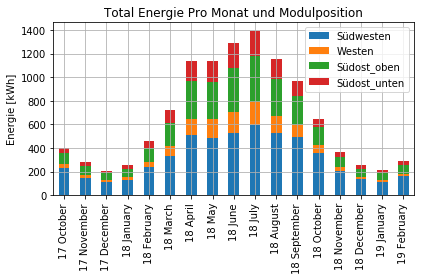

In [126]:
# First resample to monthly data, aggregate by sum.
df_monthly = df.resample('M').sum()

# Change the datetimeindex format to the long name for the month.
df_monthly = df_monthly.set_index(df_monthly.index.strftime('%y %B'))

# print(df_monthly.loc[:, module_position['Südwesten']].sum(axis='columns'))
# print(df_monthly.head())

# Create a new dataframe with the aggregated data
df_monthly_agg = pd.DataFrame()
for pos in module_position:
    g = df_monthly.loc[:, module_position[pos]].sum(axis='columns')
    df_monthly_agg[pos] = g
    
print(df_monthly_agg.head())
df_monthly_agg.plot(kind='bar', stacked=True)
_ = plt.title('Total Energie Pro Monat und Modulposition')
_ = plt.ylabel('Energie [kWh]')
_ = plt.grid()
_ = plt.tight_layout()
# output figure
filename_fig = f'{directory}/{currentDT.year}-{currentDT.month}-{currentDT.day}_solarData.monthly'
plt.savefig(filename_fig + '.png', dpi=600)
plt.show()

# Plot Monthly aggregated RELATIVE energy per module position

- Show the values relative to the total monthly

- Plot stacked bar

             Südwesten    Westen  Südost_oben  Südost_unten
17 October   229.56475  34.55525     95.63850      42.79000
17 November  149.75025  24.48750     71.28575      33.92925
17 December  116.78150  15.51275     53.56675      20.41300
18 January   130.96975  24.43400     65.72175      33.71050
18 February  239.42200  40.35575    121.04700      60.25500
             Südwesten    Westen  Südost_oben  Südost_unten
17 October   229.56475  34.55525     95.63850      42.79000
17 November  149.75025  24.48750     71.28575      33.92925
17 December  116.78150  15.51275     53.56675      20.41300
18 January   130.96975  24.43400     65.72175      33.71050
18 February  239.42200  40.35575    121.04700      60.25500


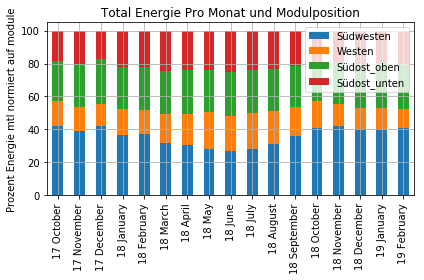

In [127]:
# Create a new dataframe with the relative aggregated data
print(df_monthly_agg.head())



# divide by number of modules
df_monthly_agg_norm = pd.DataFrame()
for pos in module_position:
    g = df_monthly_agg.loc[:, pos].divide(len(module_position[pos]))
    df_monthly_agg_norm[pos] = g

    
df_monthly_agg_norm['row_sum'] = df_monthly_agg_norm.sum(axis='columns')
# relative monthly
df_monthly_agg_norm = df_monthly_agg_norm.divide(df_monthly_agg_norm['row_sum'], axis='rows') * 100
df_monthly_agg_norm = df_monthly_agg_norm.drop(columns=['row_sum'])


    

print(df_monthly_agg.head())

df_monthly_agg_norm.plot(kind='bar', stacked=True)
_ = plt.title('Total Energie Pro Monat und Modulposition')
_ = plt.ylabel('Prozent Energie mtl normiert auf module')
_ = plt.grid()
_ = plt.tight_layout()
# output figure
filename_fig = f'{directory}/{currentDT.year}-{currentDT.month}-{currentDT.day}_solarData.monthly.relative'
plt.savefig(filename_fig + '.png', dpi=600)
plt.show()